## Autoencoder

An autoencoder is an unsupervised learning technique for neural networks that learns efficient data representations (encoding) by training the network to ignore signal “noise.” Autoencoders can be used for image denoising, image compression, and, in some cases, even generation of image data.

## Flow of Autoencoder

Input Image -> Encoder -> Compressed Representation -> Decoder -> Reconstruct Input Image

## Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

## Load the Dataset

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
# normalize the image data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
# reshape in the input data for the model
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

## Exploratory Data Analysis

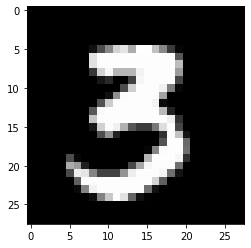

In [6]:
# randomly select input image
index = np.random.randint(len(x_test))

# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

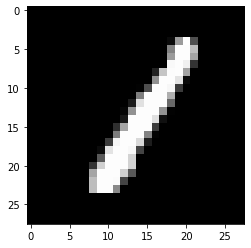

In [7]:
# randomly select input image
index = np.random.randint(len(x_test))

# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

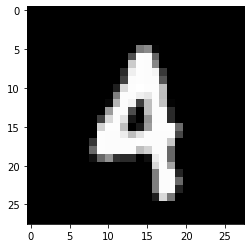

In [8]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

## Model Creation

In [9]:
model = Sequential([
                    # encoder network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 16)       0

In [10]:
# train the model
model.fit(x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 13s 13ms/step - loss: 0.1523 - val_loss: 0.0869
Epoch 2/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0834 - val_loss: 0.0792
Epoch 3/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0784 - val_loss: 0.0764
Epoch 4/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0760 - val_loss: 0.0758
Epoch 5/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0745 - val_loss: 0.0731
Epoch 6/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0735 - val_loss: 0.0722
Epoch 7/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0726 - val_loss: 0.0718
Epoch 8/20
235/235 [==============================] - 2s 11ms/step - loss: 0.0719 - val_loss: 0.0710
Epoch 9/20
235/235 [==============================] - 2s 11ms/step - loss: 0.0714 - val_loss: 0.0706
Epoch 10/20
235/235 [==============================] - 2s 11ms/step - loss: 0.0709 - val_l

## Visualize the Results

In [11]:
# predict the results from model (get compressed images)
pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


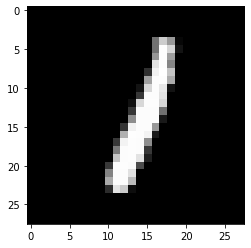

In [12]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

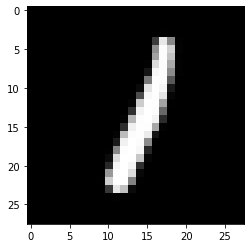

In [13]:
# visualize compressed image
plt.imshow(pred[index].reshape(28,28))
plt.gray()

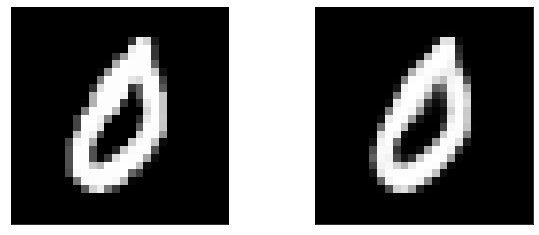

In [14]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

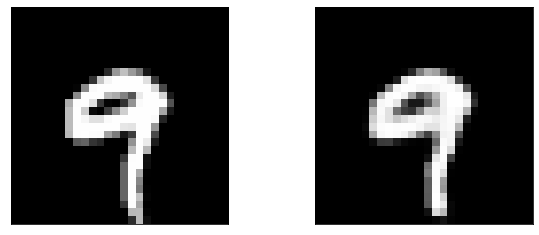

In [15]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()